In [17]:
#%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"




In [18]:
# Read the City 
city_data = pd.read_csv(city_data_to_load)
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [19]:
# Read the Ride Data
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [20]:
# Combine the data into a single dataset
pyber = pd.merge(ride_data, city_data, on='city', how='left')
# Display the data table for preview
pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [7]:
#check to confirm all city types
city_type = pyber.groupby('type')
city_type['city'].count()


type
Rural        125
Suburban     625
Urban       1625
Name: city, dtype: int64

In [51]:
#fliter Pyber dataframe for each city type and group by each city
rural_cities = pyber[pyber["type"] == "Rural"].groupby([pyber["city"]])
urban_cities = pyber[pyber["type"] == "Urban"].groupby([pyber["city"]])
suburban_cities = pyber[pyber["type"] == "Suburban"].groupby([pyber["city"]])



Text(42,35,'Note: \nCircle Size Corrolates with driver count per city')

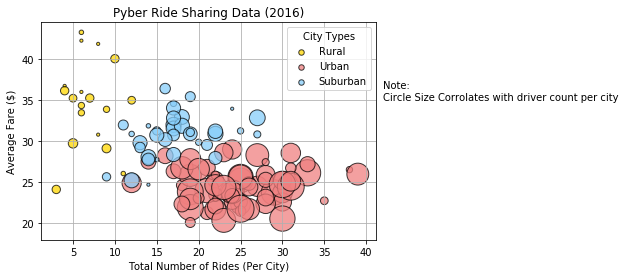

In [109]:
# Obtain the x, y and s coordinates for each of the three city types


x_rural = rural_cities['ride_id'].count()
y_rural = rural_cities['fare'].mean()
s_rural = rural_cities['driver_count'].mean()*10

x_urban = urban_cities['ride_id'].count()
y_urban = urban_cities['fare'].mean()
s_urban = urban_cities['driver_count'].mean()*10

x_suburban = suburban_cities['ride_id'].count()
y_suburban = suburban_cities['fare'].mean()
s_suburban = suburban_cities['driver_count'].mean()*10


# Build the scatter plots for each city types
plt.scatter(x=x_rural, y=y_rural, s=s_rural, color='gold', edgecolor="black", alpha=0.75, label='Rural')
plt.scatter(x=x_urban, y=y_urban, s=s_urban, color='lightcoral', edgecolor="black", alpha=0.75, label='Urban')
plt.scatter(x=x_suburban, y=y_suburban, s=s_suburban, color='lightskyblue', edgecolor="black", alpha=0.75, label='Suburban')

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
legend = plt.legend(title= "City Types", loc="best") 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note: \nCircle Size Corrolates with driver count per city")

# Save Figure
#plt.savefig("../Images/PyberRideSharingData.png")

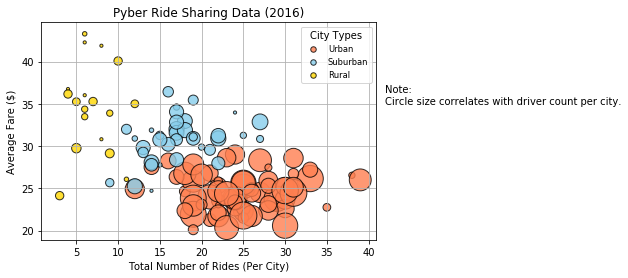

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

Text(0.5,1,'% of Total Fares by City Type')

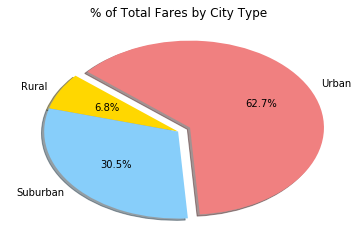

In [116]:
# Calculate Type Percents


city_fares = city_type['fare'].sum()
#city_fares


# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(city_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")


# Save Figure
#plt.savefig("Images/TotalFaresbyCityType.png")

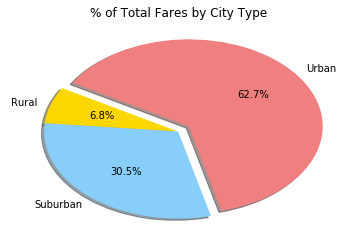

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5,1,'% of Total Rides by City Type')

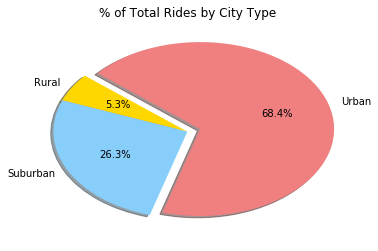

In [118]:
# Calculate Ride Percents
city_rides = city_type['ride_id'].count()
city_rides

# Build Pie Chart
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(city_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")

# Build Pie Chart

# Save Figure


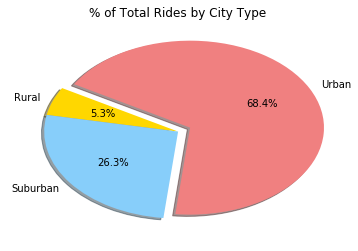

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

Text(0.5,1,'% of Total Drivers by City Type')

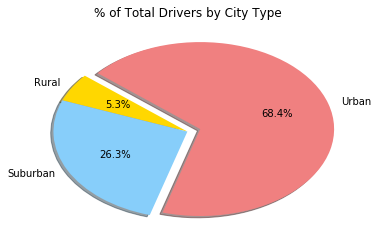

In [122]:
# Calculate Driver Percents
driver_count = city_type['driver_count'].sum()
driver_count

# Build Pie Charts
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)
plt.pie(city_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

# Save Figure


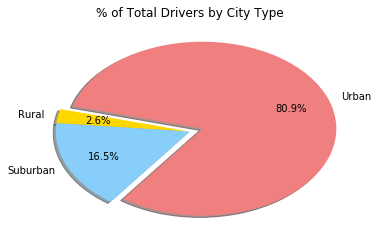

In [6]:
# Show Figure
plt.show()